# Image Comparison

In this notebook I will attempt some image comparisons using images that are not contained within the database, I will use images from another retail site as well as images taken from a general google image seach. Images that contain an external background (those taken outside of a studio) have been processed using the method found in the **Input_Image_Processing.pynb** workbook, this will have removed some of the background noise of these images. The images have then been resized histograms have been generated using the method found in **Input_Histogram_Builder.pynb**. The resulting Histograms have been saved in a csv format and are imported here along with the histogram data of the entire Dataset.

I will 5 different histogram distance measures (as found in the documentation http://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_comparison/histogram_comparison.html) to find the closest matching 5 shoes for each input image, as the histograms do not take colour into account, this will be added separetly.

In [43]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
% matplotlib inline

### Import Database and Sample Image Features

In [55]:
Textures_Test=pd.read_csv('Texture_Features_TEST.csv')
Textures_DB=pd.read_csv('Texture_Features_All.csv')

In [56]:
Textures_Test.head()

0    1    2    3    4     5    6    7    8    9  ...   1490  1491  1492  \
0  2.5  0.0  0.0  0.0  0.0   0.0  0.0  3.5  0.5  0.0  ...    0.0   0.0   0.0   
1  2.0  1.5  1.0  0.0  0.0  14.0  0.0  6.5  1.5  0.0  ...    0.0   0.0   0.0   
2  1.5  0.0  0.0  0.0  0.0   3.5  0.0  7.5  0.0  0.0  ...    0.0   0.0   0.0   
3  1.0  0.0  0.0  0.0  0.0   1.5  0.0  4.0  0.0  0.0  ...    0.0   0.0   0.0   
4  0.0  0.0  5.5  0.0  0.0   0.0  0.0  1.0  0.0  0.0  ...    0.0   0.0   0.0   

   1493  1494  1495  1496  1497  1498  1499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.5  

[5 rows x 1500 columns]

In [57]:
Textures_DB.head()

0    1    2    3    4     5    6     7    8    9  ...   1490  1491  1492  \
0  0.0  0.0  1.0  0.0  0.0   0.0  0.0   5.5  0.0  0.0  ...    0.0   0.0   0.0   
1  0.0  0.0  1.5  0.0  0.0  11.5  0.0   6.0  0.0  0.0  ...    0.0   0.0   0.0   
2  0.5  1.0  0.0  0.0  0.0   4.5  0.0   8.0  0.0  0.0  ...    0.0   0.0   0.0   
3  0.0  0.0  1.5  0.0  0.0   6.5  0.0   2.0  0.0  0.0  ...    0.0   0.0   0.0   
4  2.0  4.5  0.0  0.0  0.0  19.0  0.0  12.5  3.0  0.0  ...    0.0   0.0   0.0   

   1493  1494  1495  1496  1497  1498  1499  
0   0.0   0.0   0.0   0.0   0.0   0.0   2.5  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   1.5   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   3.5   0.0  

[5 rows x 1500 columns]

### Assign Shoe IDs to each of the shoes in the database

In [58]:
FAF_Order=[x for x in listdir('/Users/annacrawford/Desktop/Images_Sort/FAF/') if x[-4:]=='.jpg']
HAR_Order=[x for x in listdir('/Users/annacrawford/Desktop/Images_Sort/HAR/') if x[-4:]=='.jpg']
NAP_Order=[x for x in listdir('/Users/annacrawford/Desktop/Images_Sort/NAP/') if x[-4:]=='.jpg']
SFA_Order=[x for x in listdir('/Users/annacrawford/Desktop/Images_Sort/SFA/') if x[-4:]=='.jpg']

In [59]:
Combined_Order=FAF_Order+HAR_Order+NAP_Order+SFA_Order
Combined_Order=[x.split('_')[1] for x in Combined_Order]

0    1    2    3    4     5    6     7    8    9  ...    1491  1492  \
0  0.0  0.0  1.0  0.0  0.0   0.0  0.0   5.5  0.0  0.0  ...     0.0   0.0   
1  0.0  0.0  1.5  0.0  0.0  11.5  0.0   6.0  0.0  0.0  ...     0.0   0.0   
2  0.5  1.0  0.0  0.0  0.0   4.5  0.0   8.0  0.0  0.0  ...     0.0   0.0   
3  0.0  0.0  1.5  0.0  0.0   6.5  0.0   2.0  0.0  0.0  ...     0.0   0.0   
4  2.0  4.5  0.0  0.0  0.0  19.0  0.0  12.5  3.0  0.0  ...     0.0   0.0   

   1493  1494  1495  1496  1497  1498  1499     ID  
0   0.0   0.0   0.0   0.0   0.0   0.0   2.5  10000  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  10001  
2   0.0   0.0   0.0   0.0   0.0   1.5   0.0  10002  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  10004  
4   0.0   0.0   0.0   0.0   0.0   3.5   0.0  10006  

[5 rows x 1501 columns]

### Histogram Comparison
The function below compares the histograms of each shoe against every shoe in the database, this is quite a slow method but can be used as a base for intial analysis, ideally the histgrams would be indexed in away to find the closest matches rapidly. The data must be converted into float 32 data types in order for the histogram comparison functions to operate correctly. Some of the histogram comparison measure provide a high value for close matches, and other provide a low value, this is reflected in the if statement below.

In [125]:
def Histogram_Compare(DB_Array,Test_Array,Method):
    DB_Length=len(DB_Array)
    Test_Length=len(Test_Array)
    Output=np.zeros((DB_Length,Test_Length))
    for x in range(DB_Length):
        for y in range(Test_Length):
                Shoe1=np.reshape(DB_Array.ix[x,0:-1],(1500,1)).astype('float32')
                Shoe2=np.reshape(Test_Array.ix[y,:],(1500,1)).astype('float32')
                if Method in [1,3,4,5]:
                    Output[x,y]=min(cv2.compareHist(Shoe1,Shoe2,Method),cv2.compareHist(Shoe2,Shoe1,Method))
                else:
                    Output[x,y]=max(cv2.compareHist(Shoe1,Shoe2,Method),cv2.compareHist(Shoe2,Shoe1,Method))
                    
    return Output

In [126]:
## Applying the Histogram Comparison Function
Output0=Histogram_Compare(Textures_DB,Textures_Test,0)
print "Processing Method 1"
Output1=Histogram_Compare(Textures_DB,Textures_Test,1)
print "Processing Method 2"
Output2=Histogram_Compare(Textures_DB,Textures_Test,2)
print "Processing Method 3"
Output3=Histogram_Compare(Textures_DB,Textures_Test,3)
print "Processing Method 4"
Output4=Histogram_Compare(Textures_DB,Textures_Test,4)
print "Processing Method 5"
Output5=Histogram_Compare(Textures_DB,Textures_Test,5)

Processing Method 1
Processing Method 2
Processing Method 3
Processing Method 4
Processing Method 5


### Creating a Dataframe for each of the comparison measures

In [127]:
Output0_DF=pd.DataFrame(data=Output0,columns=['1071095_1.jpg','1072988_1_large.jpg','1077221_1.jpg',
                                   '1077239_1.jpg','Test_1.jpg','Test_2.jpg'])
Output1_DF=pd.DataFrame(data=Output1,columns=['1071095_1.jpg','1072988_1_large.jpg','1077221_1.jpg',
                                   '1077239_1.jpg','Test_1.jpg','Test_2.jpg'])
Output2_DF=pd.DataFrame(data=Output2,columns=['1071095_1.jpg','1072988_1_large.jpg','1077221_1.jpg',
                                   '1077239_1.jpg','Test_1.jpg','Test_2.jpg'])
Output3_DF=pd.DataFrame(data=Output3,columns=['1071095_1.jpg','1072988_1_large.jpg','1077221_1.jpg',
                                   '1077239_1.jpg','Test_1.jpg','Test_2.jpg'])
Output4_DF=pd.DataFrame(data=Output4,columns=['1071095_1.jpg','1072988_1_large.jpg','1077221_1.jpg',
                                   '1077239_1.jpg','Test_1.jpg','Test_2.jpg'])
Output5_DF=pd.DataFrame(data=Output5,columns=['1071095_1.jpg','1072988_1_large.jpg','1077221_1.jpg',
                                   '1077239_1.jpg','Test_1.jpg','Test_2.jpg'])
Output0_DF.index=Combined_Order
Output1_DF.index=Combined_Order
Output2_DF.index=Combined_Order
Output3_DF.index=Combined_Order
Output4_DF.index=Combined_Order
Output5_DF.index=Combined_Order

## Image Plotting Function
The function below plots the input image and the matching images from the database based on an input list.

In [161]:
def Top_Image_Plot(Image_Inp,Image_Output):
    fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(5,2,figsize=(12,12))
    Image_List_Left=[ax1,ax3,ax5,ax7,ax9]
    Image_List_Right=[ax2,ax4,ax6,ax8,ax10]
    for axa,axb,i in zip(Image_List_Left,Image_List_Right,Image_Output):
        imloc1=''.join(['/Users/annacrawford/Colin/GA/Week1/DSI_LDN_1_LESSON_NOTES/projects/capstone/Test_Images/Matches_Images/',Image_Inp])
        imloc2=''.join(['/Users/annacrawford/Desktop/Images/','_',str(i),'_a.jpg'])
        im1=Image.open(imloc1)
        im2=Image.open(imloc2)
        axa.imshow(im1)
        axb.imshow(im2)
        axa.axis('off')
        axb.axis('off')

Find the top 5 matching images for each distance measure for a given shoe.

In [128]:
Top_Matches0=Output0_DF.sort_values(by='1077221_1.jpg',axis=0,ascending=False).head().index
Top_Matches1=Output1_DF.sort_values(by='1077221_1.jpg',axis=0,ascending=True).head().index
Top_Matches2=Output2_DF.sort_values(by='1077221_1.jpg',axis=0,ascending=False).head().index
Top_Matches3=Output3_DF.sort_values(by='1077221_1.jpg',axis=0,ascending=True).head().index
Top_Matches4=Output4_DF.sort_values(by='1077221_1.jpg',axis=0,ascending=True).head().index
Top_Matches5=Output5_DF.sort_values(by='1077221_1.jpg',axis=0,ascending=True).head().index

Plotting the top 5 matches for each distance measure for the shoe on the left.

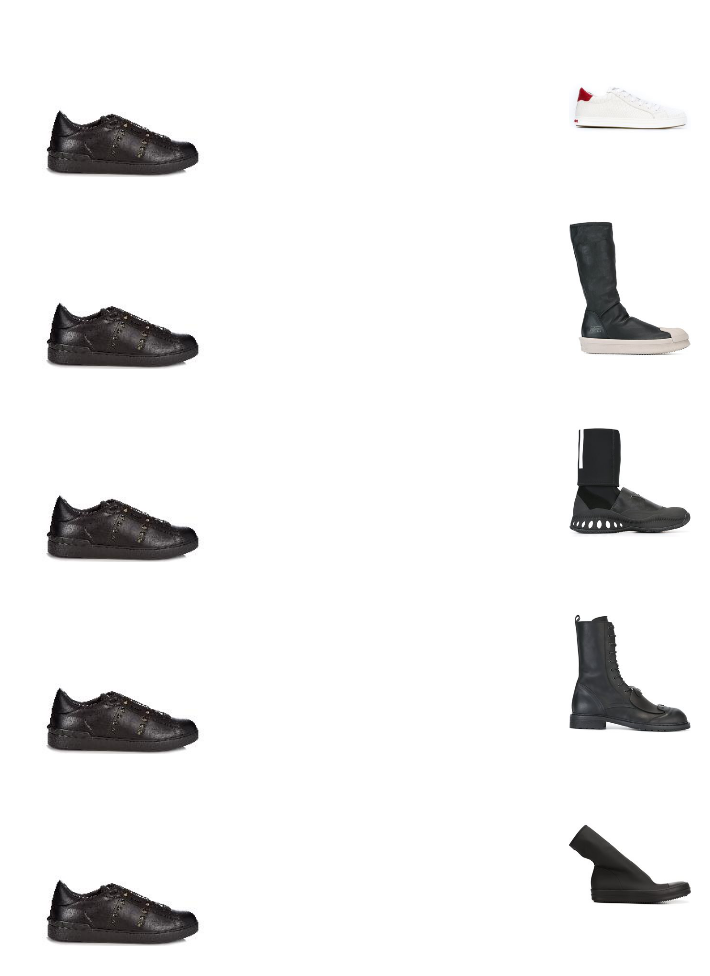

In [131]:
## Correlation
Top_Image_Plot('1077221_1.jpg',Top_Matches0)

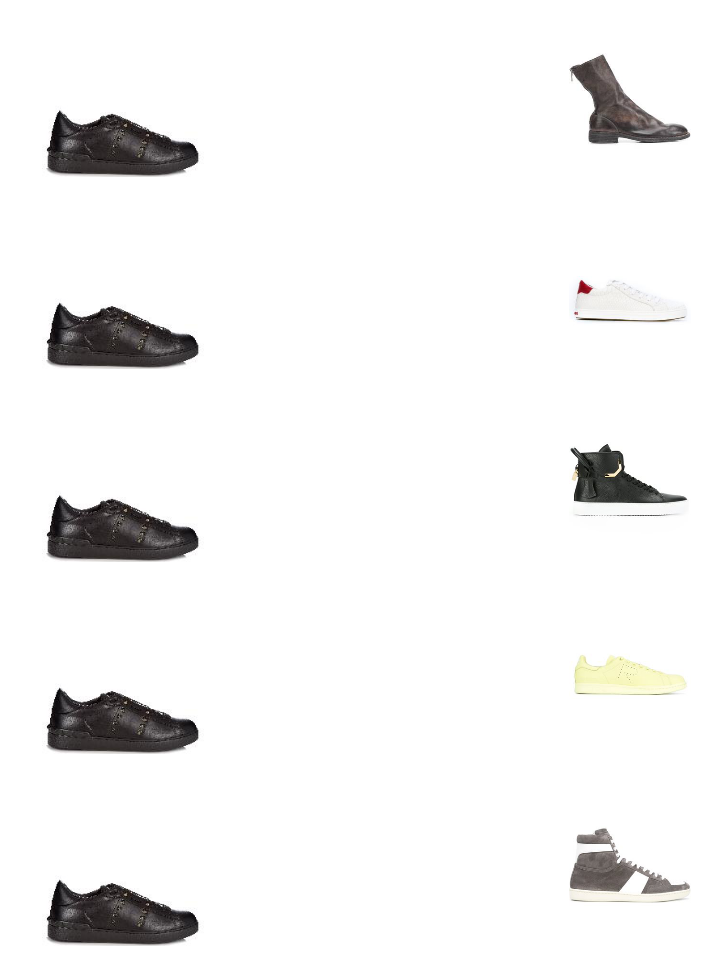

In [132]:
## Chi-Squared
Top_Image_Plot('1077221_1.jpg',Top_Matches1)

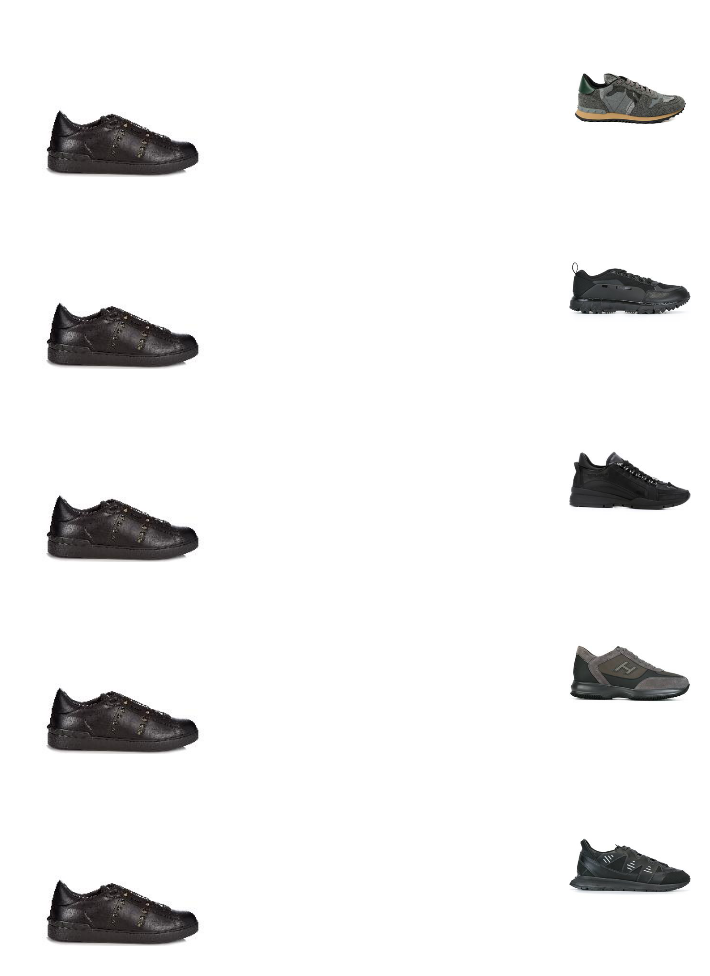

In [133]:
## Intersection
Top_Image_Plot('1077221_1.jpg',Top_Matches2)

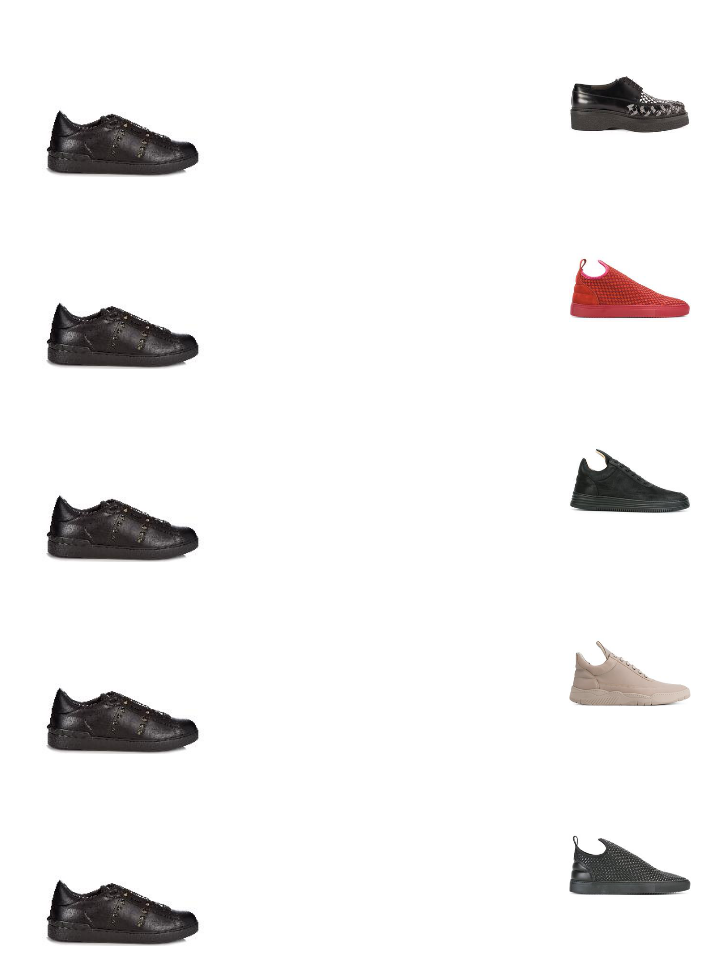

In [134]:
Top_Image_Plot('1077221_1.jpg',Top_Matches3)

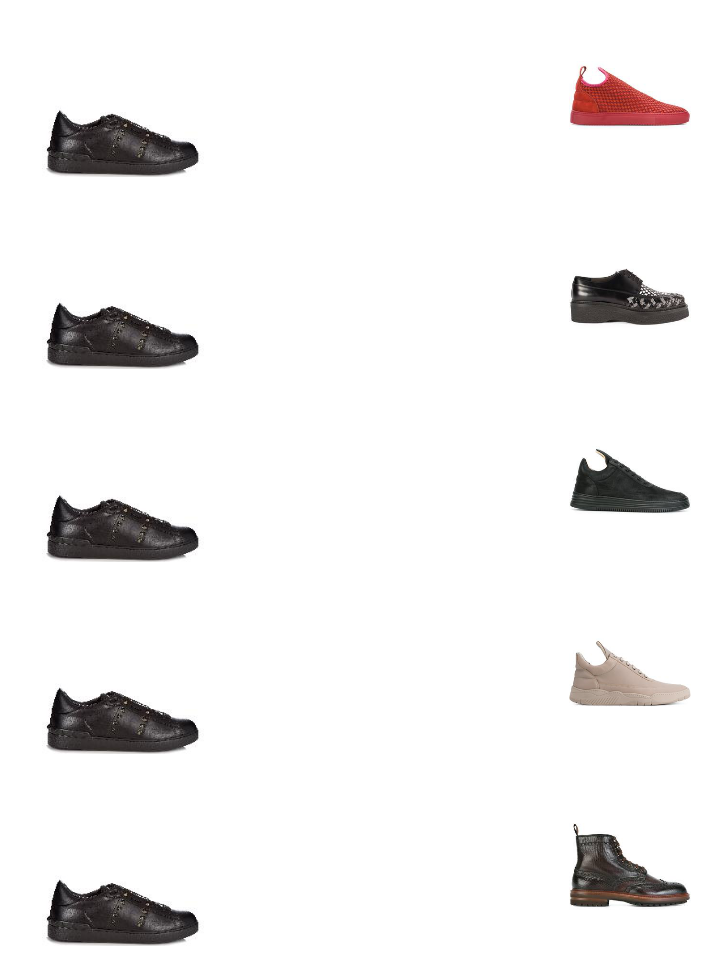

In [135]:
Top_Image_Plot('1077221_1.jpg',Top_Matches4)

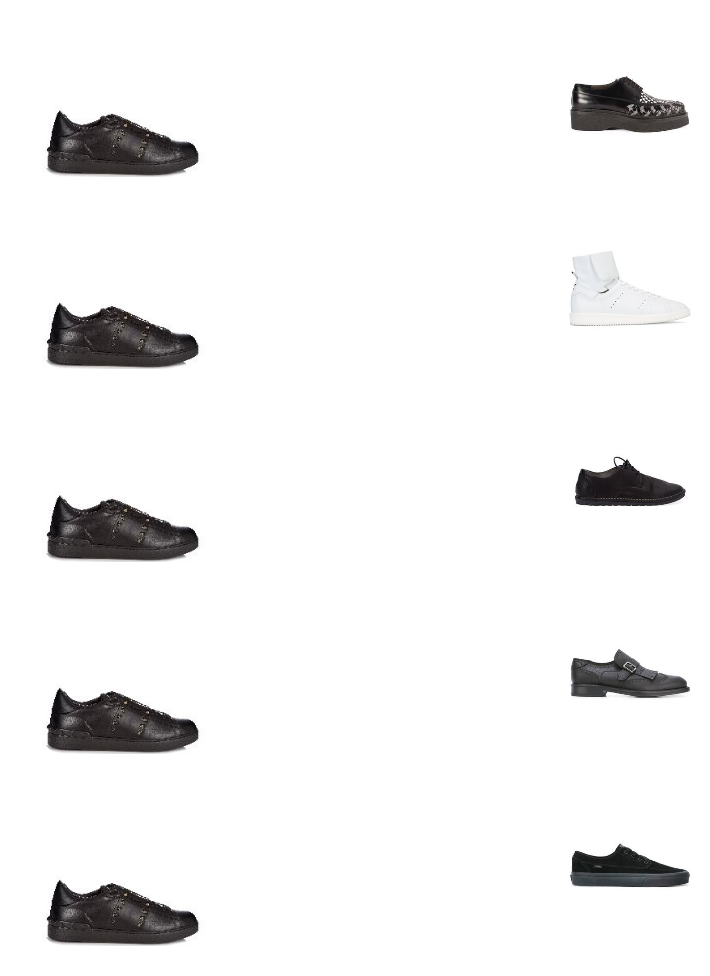

In [136]:
Top_Image_Plot('1077221_1.jpg',Top_Matches5)

Unfortunately no very good match sets have been found using any of the distance measure, as in the intial sample histogram comparisons I think the distance metric 2 has performed the best. I will now try another image in the same format taken from another website.

In [159]:
Top_Matches00=Output0_DF.sort_values(by='1077239_1.jpg',axis=0,ascending=False).head().index
Top_Matches10=Output1_DF.sort_values(by='1077239_1.jpg',axis=0,ascending=True).head().index
Top_Matches20=Output2_DF.sort_values(by='1077239_1.jpg',axis=0,ascending=False).head().index
Top_Matches30=Output3_DF.sort_values(by='1077239_1.jpg',axis=0,ascending=True).head().index
Top_Matches40=Output4_DF.sort_values(by='1077239_1.jpg',axis=0,ascending=True).head().index
Top_Matches50=Output5_DF.sort_values(by='1077239_1.jpg',axis=0,ascending=True).head().index

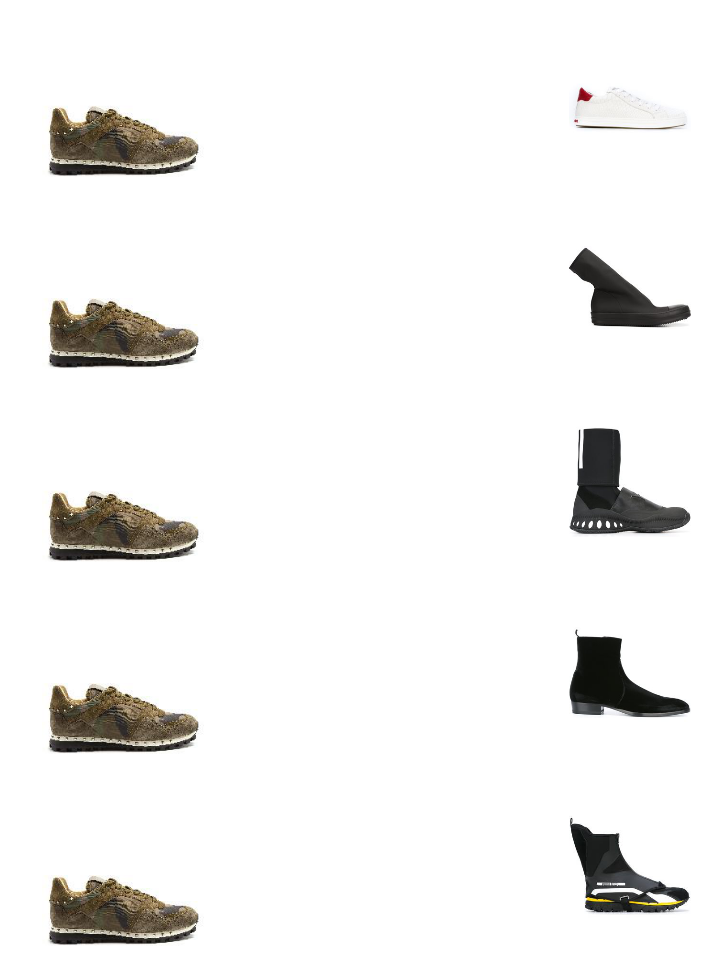

In [162]:
Top_Image_Plot('1077239_1.jpg',Top_Matches00)

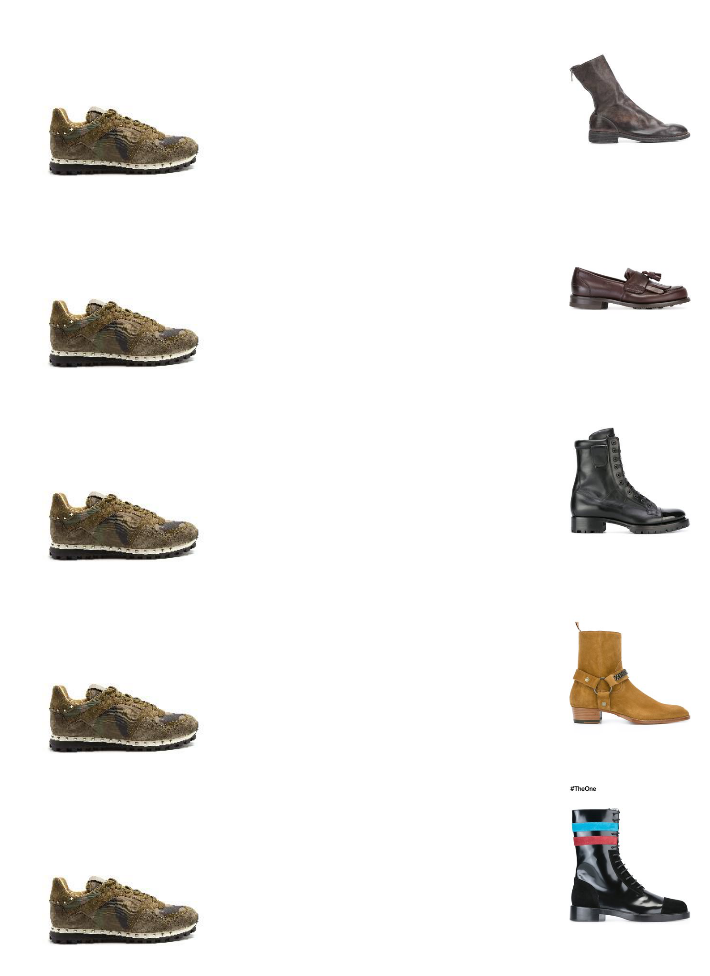

In [167]:
Top_Image_Plot('1077239_1.jpg',Top_Matches10)

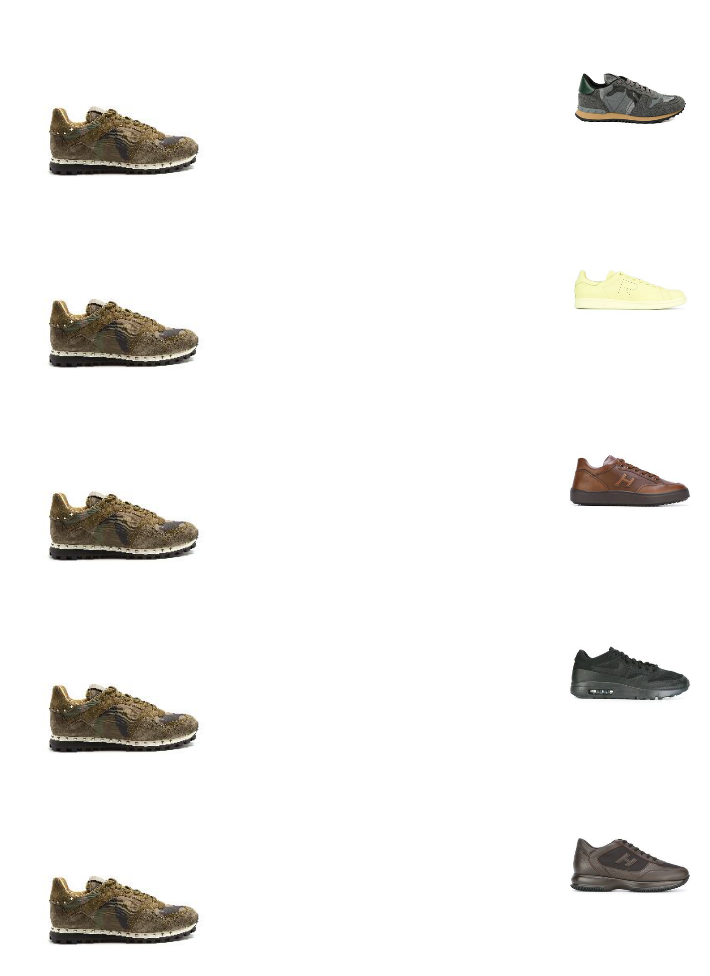

In [169]:
Top_Image_Plot('1077239_1.jpg',Top_Matches20)

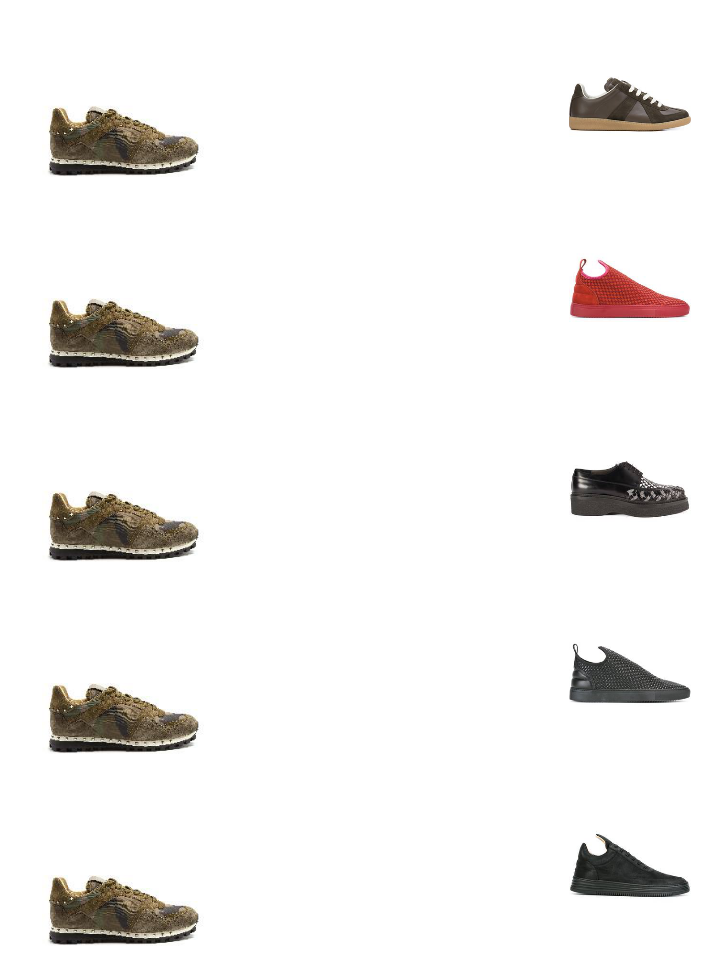

In [170]:
Top_Image_Plot('1077239_1.jpg',Top_Matches30)

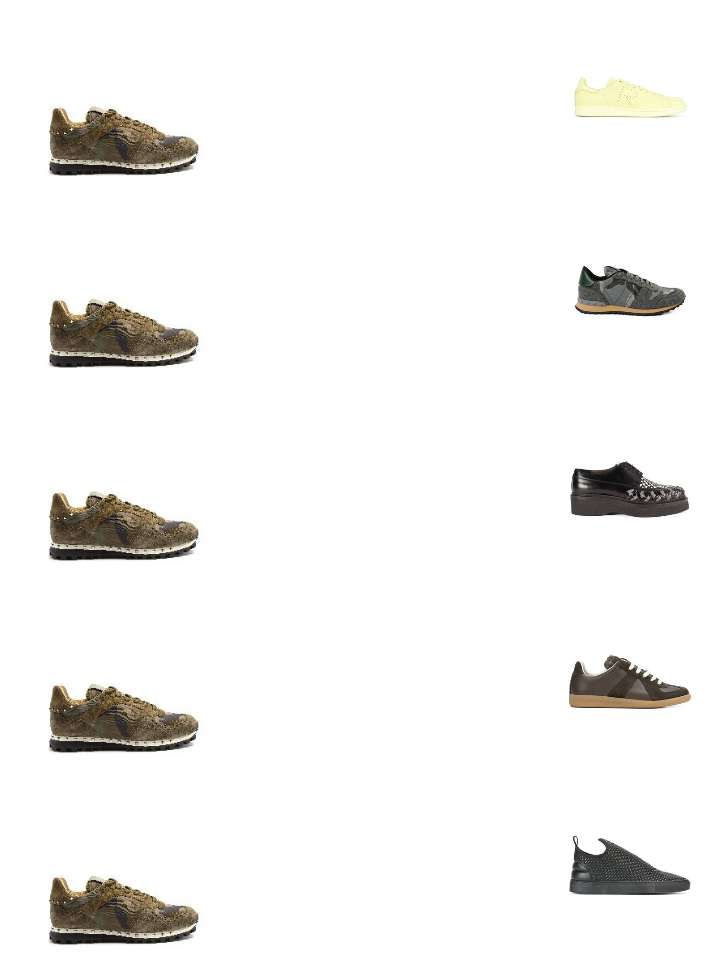

In [171]:
Top_Image_Plot('1077239_1.jpg',Top_Matches40)

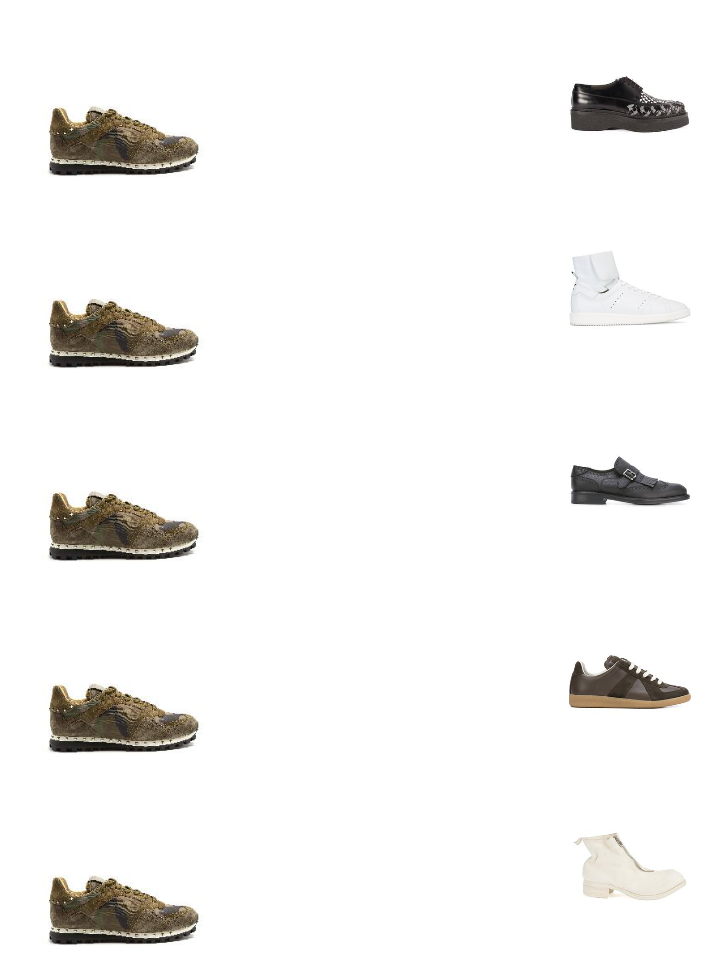

In [172]:
Top_Image_Plot('1077239_1.jpg',Top_Matches50)

In this instance the shoe has been matched correctly using distance metric 2. The other shoes in the set are also fairly similar.

I will now try unclean images, ie. images photos that have been taken in the street with a lot of noise. These images have been slightly processed in that as much of the noise has been removed, however I am unsure how the histogram comparison will perform. Another issue is that the input images are flipped from the orintation of all of the shoes in the database.

In [139]:
Top_Matches01=Output0_DF.sort_values(by='Test_2.jpg',axis=0,ascending=False).head().index
Top_Matches11=Output1_DF.sort_values(by='Test_2.jpg',axis=0,ascending=True).head().index
Top_Matches21=Output2_DF.sort_values(by='Test_2.jpg',axis=0,ascending=False).head().index
Top_Matches31=Output3_DF.sort_values(by='Test_2.jpg',axis=0,ascending=True).head().index
Top_Matches41=Output4_DF.sort_values(by='Test_2.jpg',axis=0,ascending=True).head().index
Top_Matches51=Output5_DF.sort_values(by='Test_2.jpg',axis=0,ascending=True).head().index

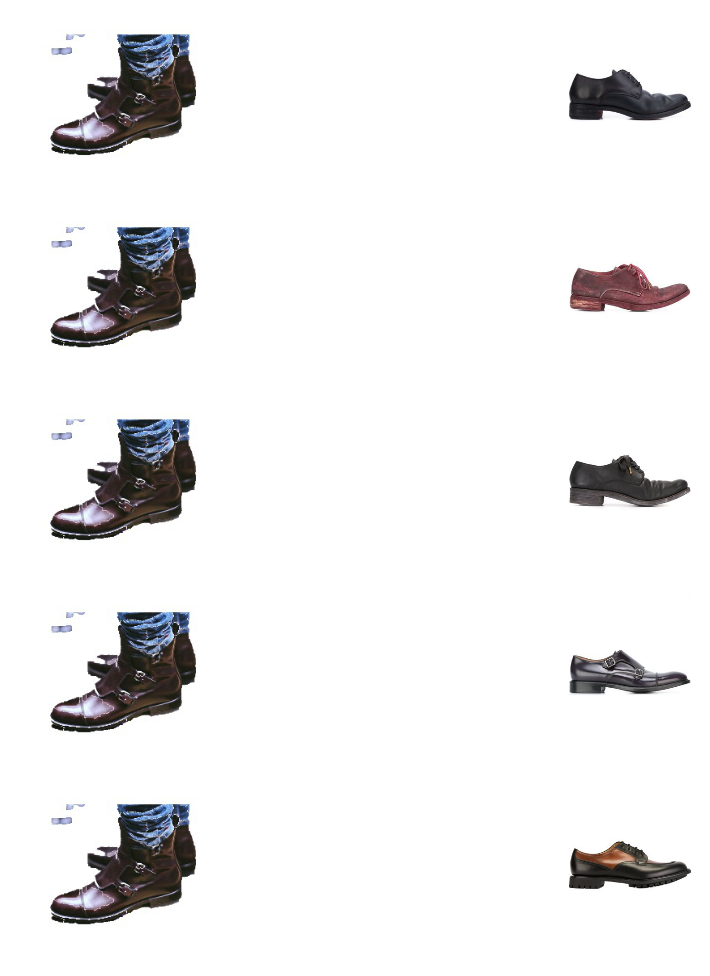

In [142]:
Top_Image_Plot('Test_2.jpg',Top_Matches01)

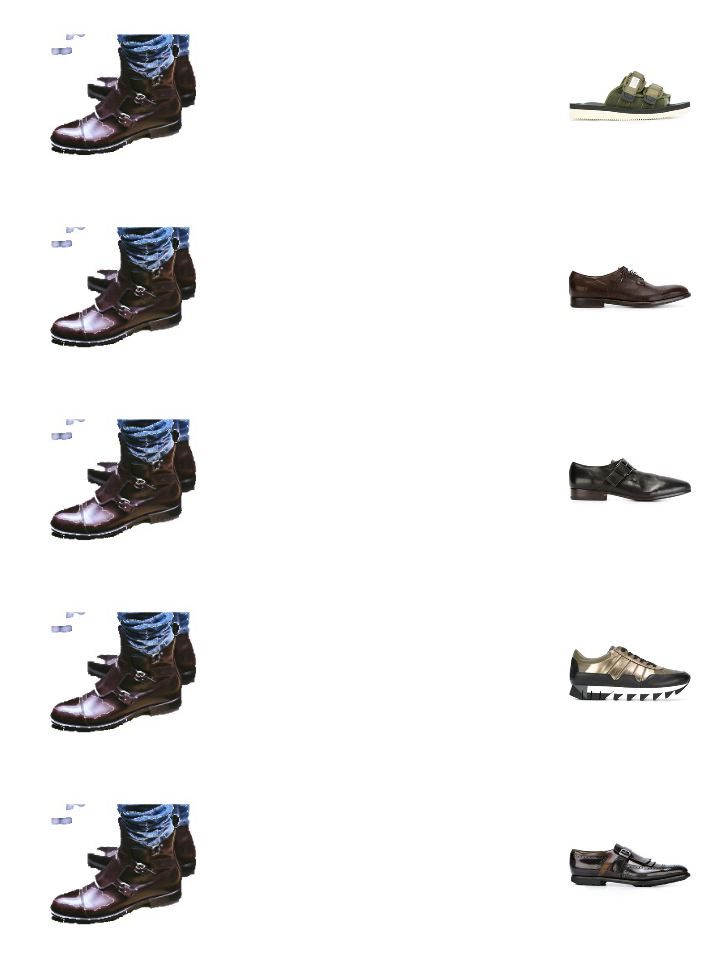

In [143]:
Top_Image_Plot('Test_2.jpg',Top_Matches11)

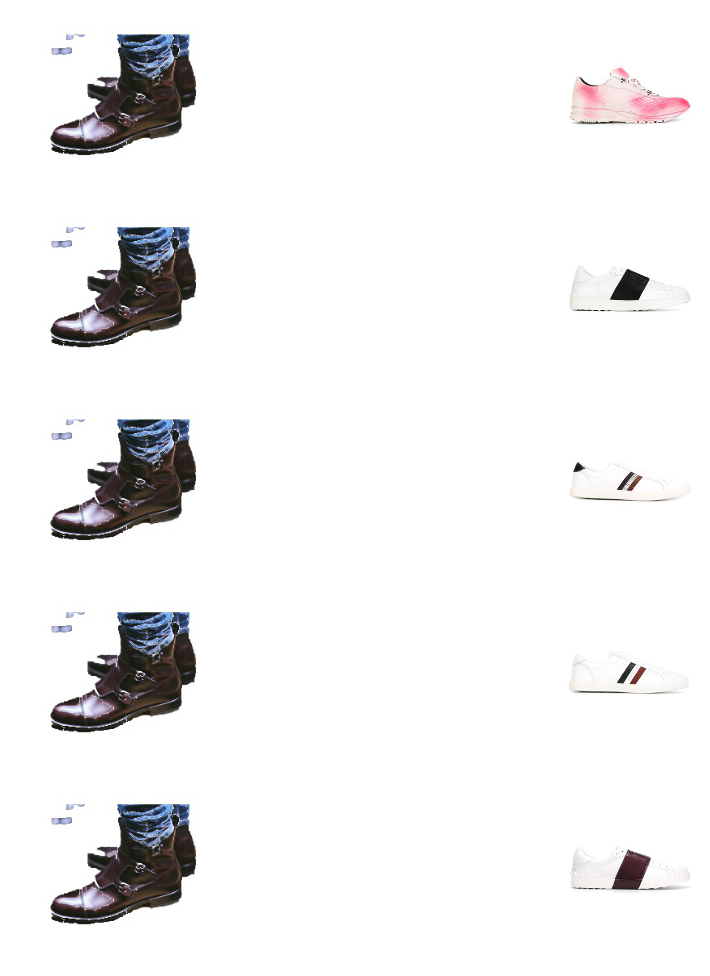

In [144]:
Top_Image_Plot('Test_2.jpg',Top_Matches21)

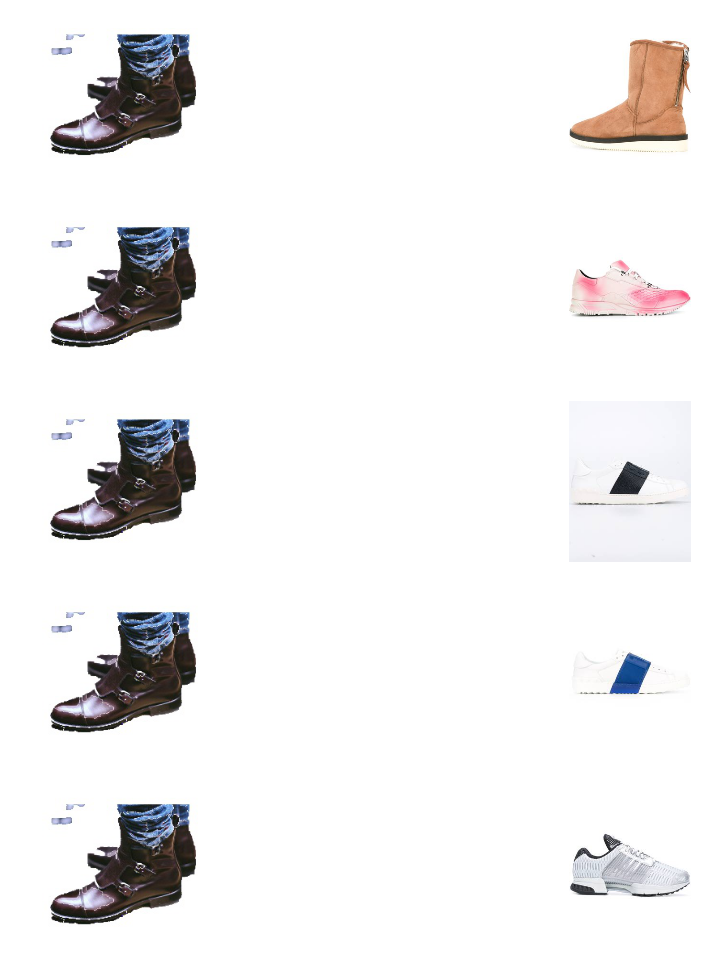

In [145]:
Top_Image_Plot('Test_2.jpg',Top_Matches31)

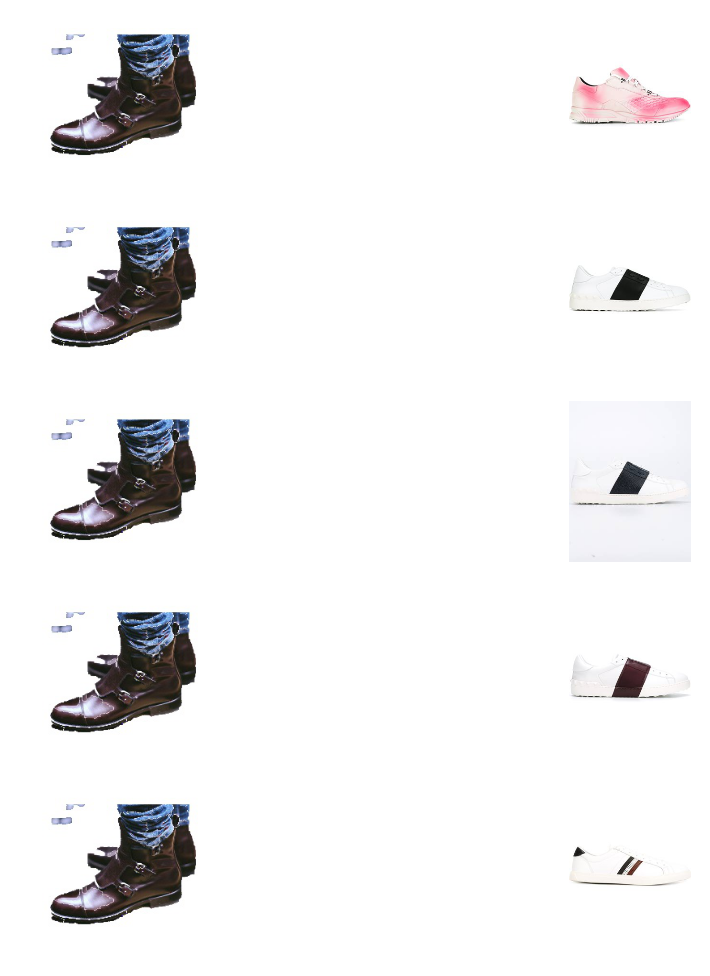

In [146]:
Top_Image_Plot('Test_2.jpg',Top_Matches41)

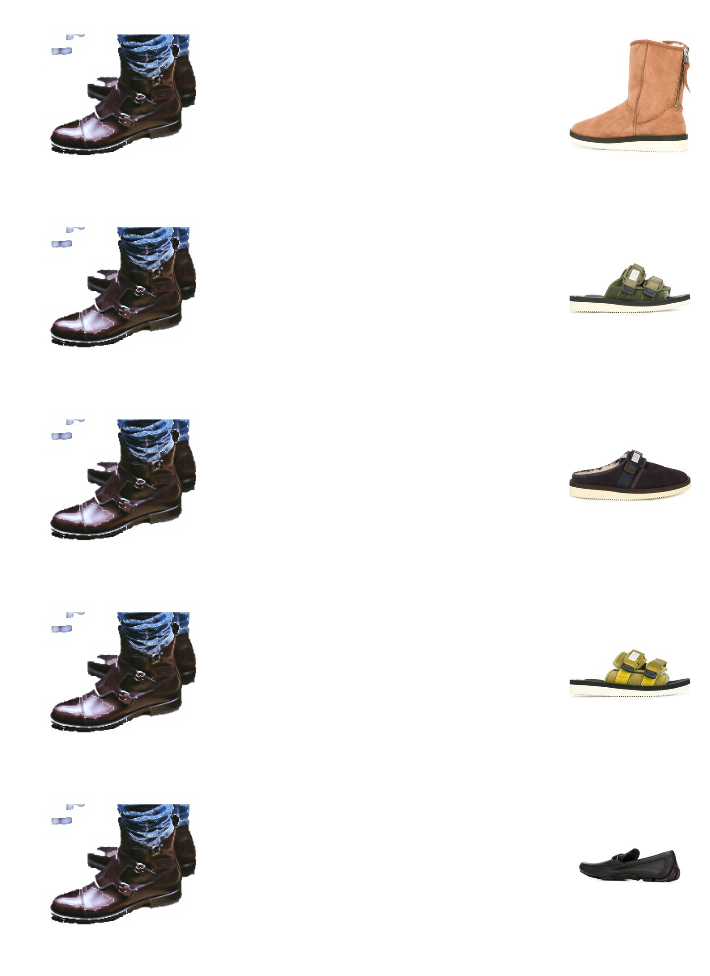

In [147]:
Top_Image_Plot('Test_2.jpg',Top_Matches51)

The image recommendation for these imput shoes has completely failed. There are no close comparisons, and the only pair of boots found is very dissimilar. I would like to try this comparison again later with the image mirrored to the correct orintation. It would also be interesting to only compare against boot images.

In [148]:
Top_Matches02=Output0_DF.sort_values(by='Test_1.jpg',axis=0,ascending=False).head().index
Top_Matches12=Output1_DF.sort_values(by='Test_1.jpg',axis=0,ascending=True).head().index
Top_Matches22=Output2_DF.sort_values(by='Test_1.jpg',axis=0,ascending=False).head().index
Top_Matches32=Output3_DF.sort_values(by='Test_1.jpg',axis=0,ascending=True).head().index
Top_Matches42=Output4_DF.sort_values(by='Test_1.jpg',axis=0,ascending=True).head().index
Top_Matches52=Output5_DF.sort_values(by='Test_1.jpg',axis=0,ascending=True).head().index

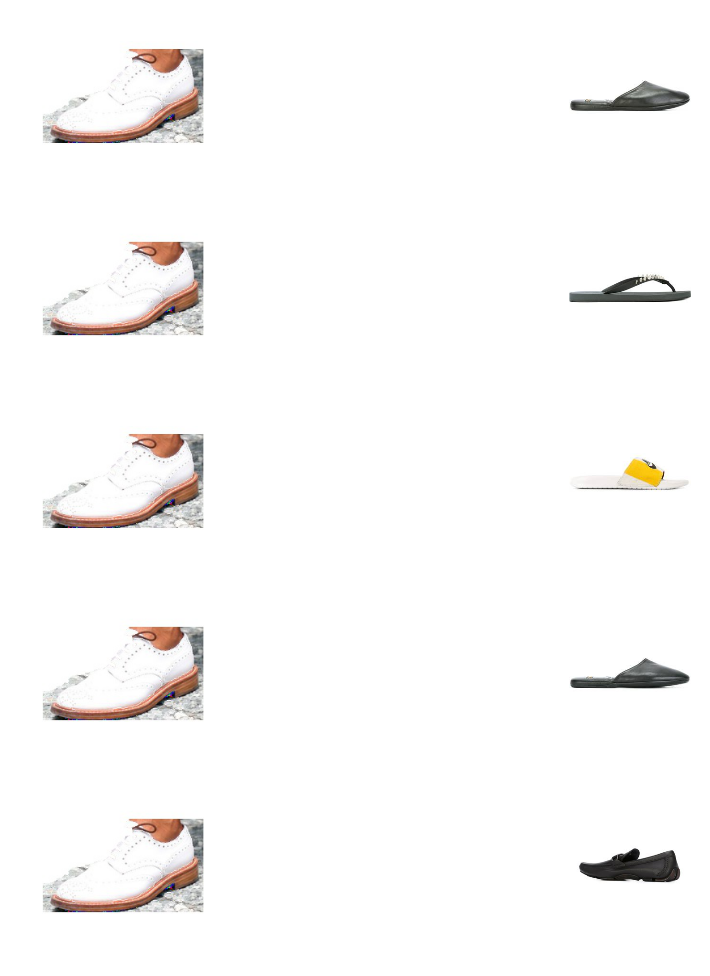

In [150]:
Top_Image_Plot('Test_1.jpg',Top_Matches02)

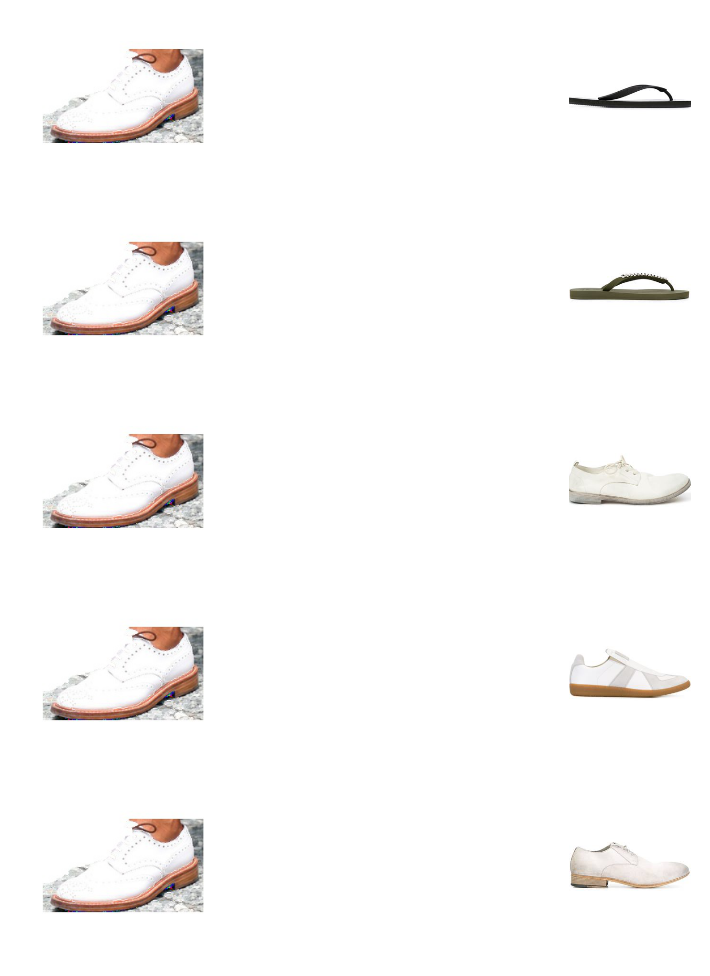

In [151]:
Top_Image_Plot('Test_1.jpg',Top_Matches12)

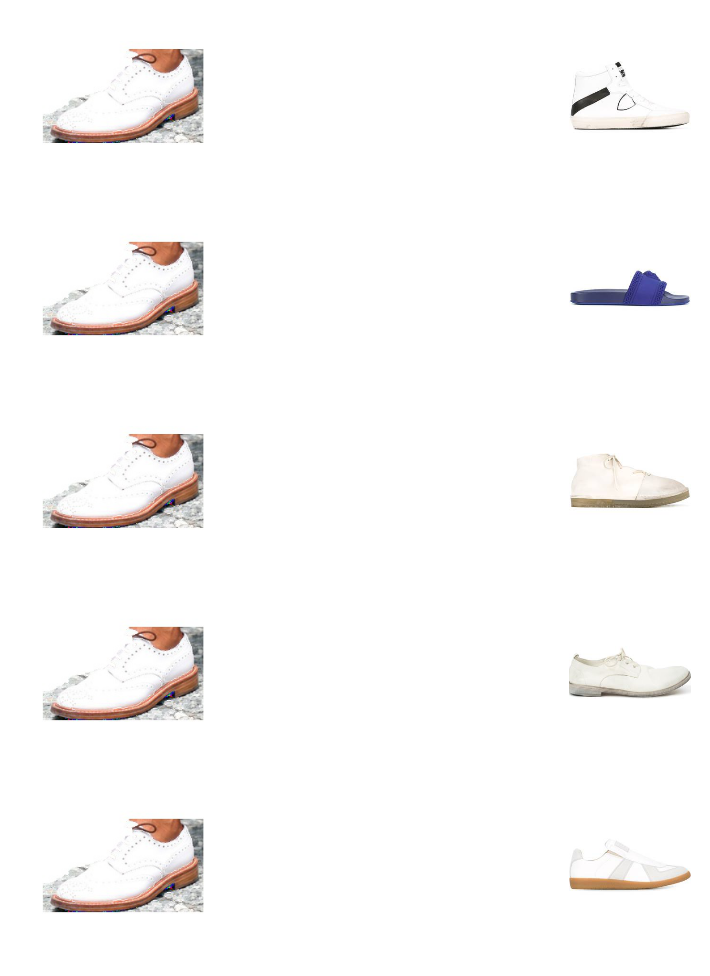

In [152]:
Top_Image_Plot('Test_1.jpg',Top_Matches22)

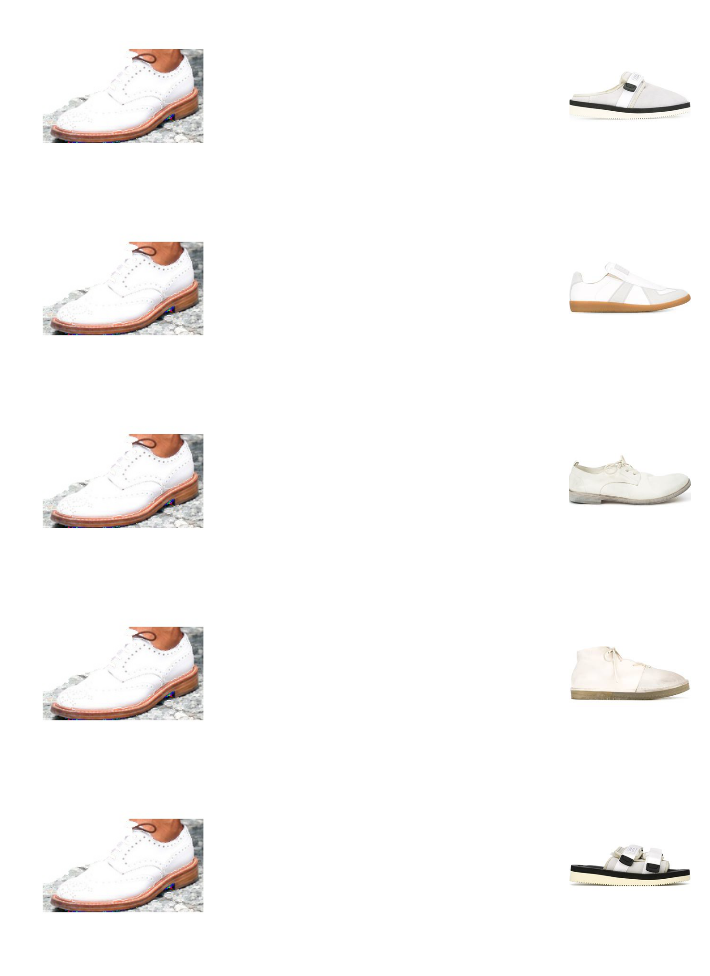

In [155]:
Top_Image_Plot('Test_1.jpg',Top_Matches32)

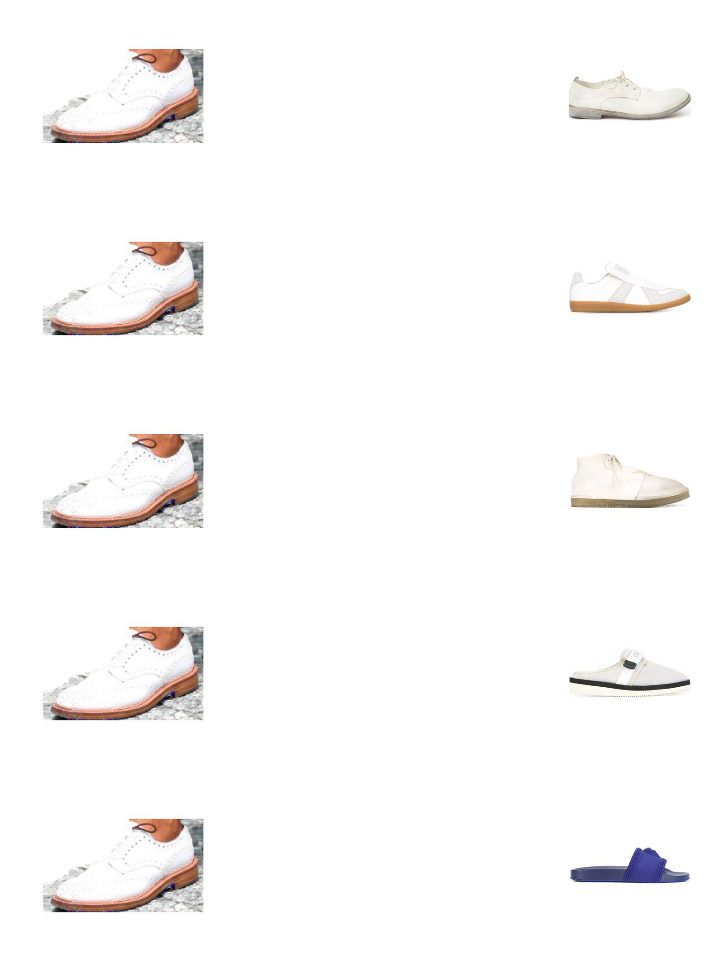

In [156]:
Top_Image_Plot('Test_1.jpg',Top_Matches42)

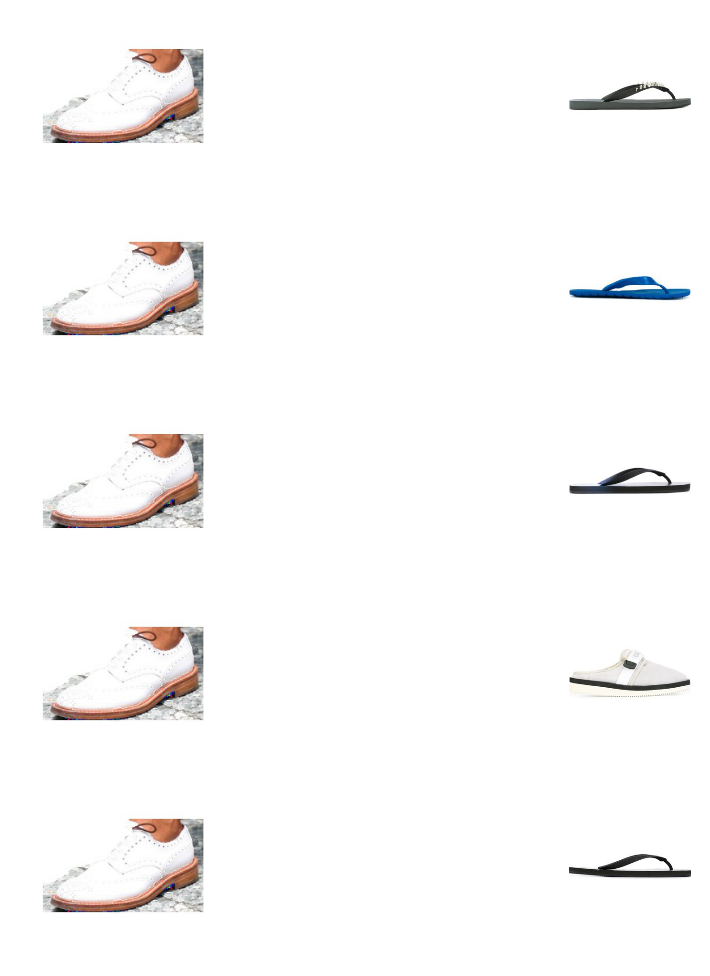

In [158]:
Top_Image_Plot('Test_1.jpg',Top_Matches52)

The final imput images has a mixed performance, an almost identical shoe has appeard in a number of the top 5s, but so have some sandles and other very dissimilar shoes. I think with refinement the model could work, and also with the addition of dominant colours.